In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install autoviz

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from autoviz.AutoViz_Class import AutoViz_Class

In [ ]:
b= sns
sns.set_theme(style="whitegrid") 
color=sns.color_palette("husl", 6)


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Data science/My projects/Pakistan house price prediction/Property_with_Feature_Engineering.csv')

In [ ]:
df.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,latitude,longitude,baths,area,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",31.483869,74.325686,0,6 Kanal,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",31.431593,74.179980,5,1 Kanal,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",31.499348,74.416959,0,9 Marla,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",31.522069,74.355512,7,1 Kanal,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",31.506483,74.286017,5,11 Marla,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [ ]:
df.shape

(191393, 24)

In [ ]:
df.tail()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,latitude,longitude,baths,area,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
191388,17468383,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,70000,Very High,I-8,Islamabad,Islamabad Capital,"I-8, Islamabad, Islamabad Capital",33.668497,73.074160,0,12.4 Marla,12.4,3375.91,For Rent,3,07-24-2019,2019,7,24,Property World,Zafran
191389,17468384,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,40000,Medium,I-8,Islamabad,Islamabad Capital,"I-8, Islamabad, Islamabad Capital",33.668497,73.074160,0,12.4 Marla,12.4,3375.91,For Rent,2,07-24-2019,2019,7,24,Property World,Zafran
191390,17468482,167,https://www.zameen.com/Property/islamabad_g_10...,House,160000,High,G-10,Islamabad,Islamabad Capital,"G-10, Islamabad, Islamabad Capital",33.676104,73.013842,6,1 Kanal,20.0,5445.02,For Rent,6,07-24-2019,2019,7,24,Azaan Associates,Usman Rehman
191391,17468586,339,https://www.zameen.com/Property/dha_defence_dh...,Flat,25000,Low,DHA Defence,Islamabad,Islamabad Capital,"DHA Defence, Islamabad, Islamabad Capital",33.527944,73.161392,2,2.7 Marla,2.7,735.08,For Rent,2,07-24-2019,2019,7,24,New National Properties,TALHA MIAN AHMAD
191392,17468660,3421,https://www.zameen.com/Property/i_10_i_10_2_i_...,Upper Portion,26000,Low,I-10,Islamabad,Islamabad Capital,"I-10, Islamabad, Islamabad Capital",33.649779,73.029385,1,0 Marla,0.0,0.00,For Rent,3,07-24-2019,2019,7,24,Select Homes,"Qaiser Shahzad, Chaudhary Waseem"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   page_url       191393 non-null  object 
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   price_bin      191393 non-null  object 
 6   location       191393 non-null  object 
 7   city           191393 non-null  object 
 8   province_name  191393 non-null  object 
 9   locality       191393 non-null  object 
 10  latitude       191393 non-null  float64
 11  longitude      191393 non-null  float64
 12  baths          191393 non-null  int64  
 13  area           191393 non-null  object 
 14  area_marla     191393 non-null  float64
 15  area_sqft      191393 non-null  float64
 16  purpose        191393 non-null  object 
 17  bedrooms       191393 non-nul

In [ ]:
df.loc[:3]

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,latitude,longitude,baths,area,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",31.483869,74.325686,0,6 Kanal,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",31.431593,74.179980,5,1 Kanal,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",31.499348,74.416959,0,9 Marla,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",31.522069,74.355512,7,1 Kanal,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN


In [ ]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
price_bin            0
location             0
city                 0
province_name        0
locality             0
latitude             0
longitude            0
baths                0
area                 0
area_marla           0
area_sqft            0
purpose              0
bedrooms             0
date_added           0
year                 0
month                0
day                  0
agency           47379
agent            47380
dtype: int64

In [ ]:
#df=df.drop_duplicates()

In [ ]:
#df.shape

In [ ]:
df=df.drop(['property_id', 'location_id', 'page_url', 'area', 'area_marla', 'locality', 'agency', 'agent'],axis=1)

In [ ]:
df.columns

Index(['property_type', 'price', 'price_bin', 'location', 'city',
       'province_name', 'latitude', 'longitude', 'baths', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
index = df[df.purpose =='For Rent'].index
df = df.drop(index)

In [ ]:
df= df.drop(['purpose','price_bin','province_name','date_added'],axis=1)

In [ ]:
#df=df.rename(columns={'Area Size':'Area_size','Area Type':'Area_type','Area Category':'Area_category'})

# Data Cleaning
Check for na values




Verify unique values of each column


In [ ]:
df.shape

(127018, 12)

### Handling null values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

day              0
month            0
year             0
bedrooms         0
area_sqft        0
baths            0
longitude        0
latitude         0
city             0
location         0
price            0
property_type    0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)].head()

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day


In [ ]:
#remove null values with rows
df=df.dropna()

In [ ]:
#Statistical Summary
df.describe()

,price,latitude,longitude,baths,area_sqft,bedrooms,year,month,day
count,1.270180e+05,127018.000000,127018.000000,127018.000000,1.270180e+05,127018.000000,127018.000000,127018.000000,127018.000000
mean,2.473577e+07,29.567028,71.331775,3.070352,3.886879e+03,3.397668,2018.927514,6.262727,12.435938
std,3.942639e+07,3.638730,3.251408,2.559118,1.440484e+05,1.934565,0.259292,1.772578,8.652376
min,0.000000e+00,24.749425,31.389173,0.000000,0.000000e+00,0.000000,2018.000000,1.000000,1.000000
25%,7.500000e+06,24.954818,67.130384,1.000000,1.306800e+03,2.000000,2019.000000,6.000000,4.000000
50%,1.350000e+07,31.434742,73.083930,3.000000,1.769630e+03,3.000000,2019.000000,6.000000,11.000000
75%,2.600000e+07,31.588187,74.262550,5.000000,2.722510e+03,5.000000,2019.000000,7.000000,19.000000
max,2.000000e+09,73.184088,74.564727,403.000000,3.388000e+07,27.000000,2019.000000,12.000000,30.000000


In [ ]:
df.nunique()

property_type       7
price            1698
location         1460
city                5
latitude         7047
longitude        7504
baths              16
area_sqft         332
bedrooms           20
year                2
month              12
day                30
dtype: int64

In [ ]:
df.price.value_counts().tail(20)

4988000      1
37100000     1
182000000    1
3791000      1
1235000      1
5576000      1
775000       1
9065000      1
660000       1
545000       1
4690000      1
4575000      1
9146000      1
8720000      1
23400000     1
6590000      1
1904000      1
6475000      1
7212000      1
558000       1
Name: price, dtype: int64

In [ ]:
df.location.value_counts()

DHA Defence               16558
Bahria Town Karachi        7682
Bahria Town                6478
Gulistan-e-Jauhar          4735
Bahria Town Rawalpindi     4300
                          ...  
Club Road                     1
Sir Syed Road                 1
Kiran Villas                  1
Chungi No. 22 Road            1
Chak 8 JB Punj Garain         1
Name: location, Length: 1460, dtype: int64

In [ ]:


df.shape

(127018, 12)

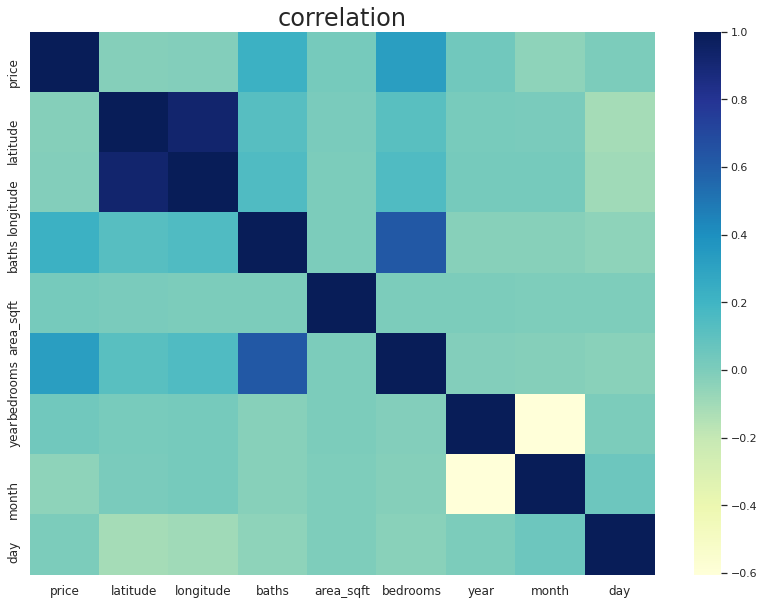

In [ ]:
figure = (14,10)
fig, dim = plt.subplots(figsize=figure)
b=sns.heatmap(df.corr(),cmap="YlGnBu")
b.axes.set_title('correlation',fontsize=24)
b.set_xlabel('',fontsize=14)
b.set_ylabel('',fontsize=14)
b.tick_params(labelsize=12)

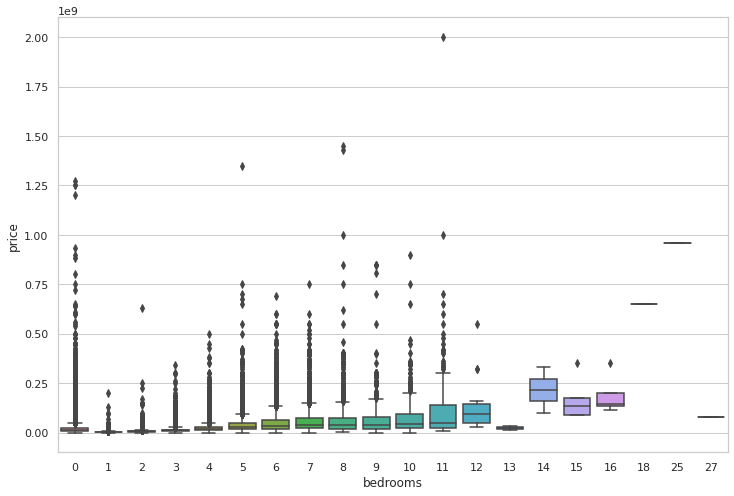

In [ ]:
figure = (12,8)
fig , ax = plt.subplots(figsize=figure)
b= sns.boxplot(x=df.bedrooms,y=df.price)

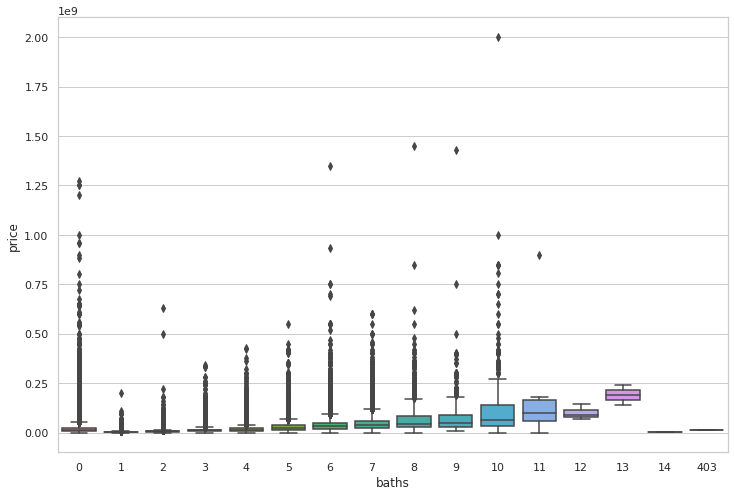

In [ ]:
figure = (12,8)
fig , ax = plt.subplots(figsize=figure)
b= sns.boxplot(x=df.baths,y=df.price)

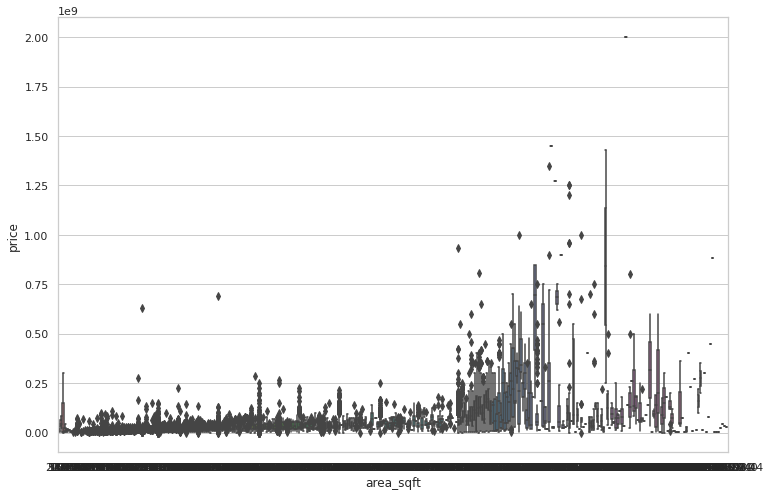

In [ ]:
figure = (12,8)
fig , ax = plt.subplots(figsize=figure)
b= sns.boxplot(x=df.area_sqft,y=df.price)

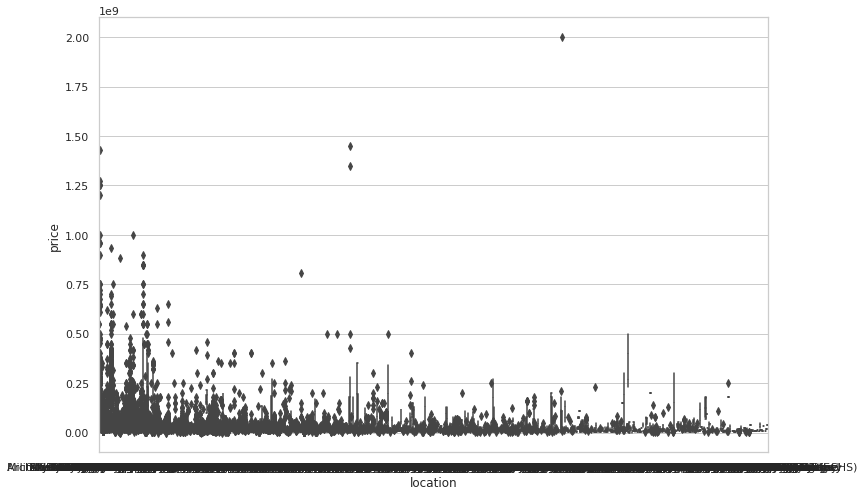

In [ ]:
figure = (12,8)
fig , ax = plt.subplots(figsize=figure)
b= sns.boxplot(x=df.location,y=df.price)

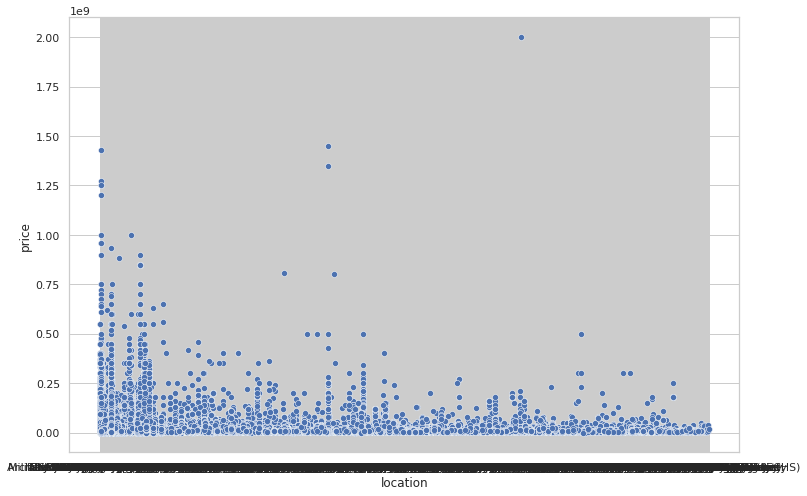

In [ ]:
figure= (12,8)
fig, ax = plt.subplots(figsize=figure)
b = sns.scatterplot(x= df.location,y=df.price)

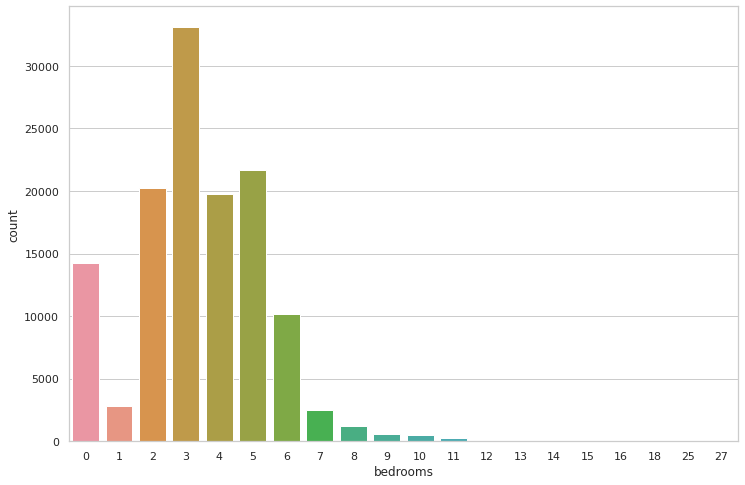

In [ ]:
figure = (12,8)
fig , ax = plt.subplots(figsize=figure)
b= sns.countplot(x=df.bedrooms)

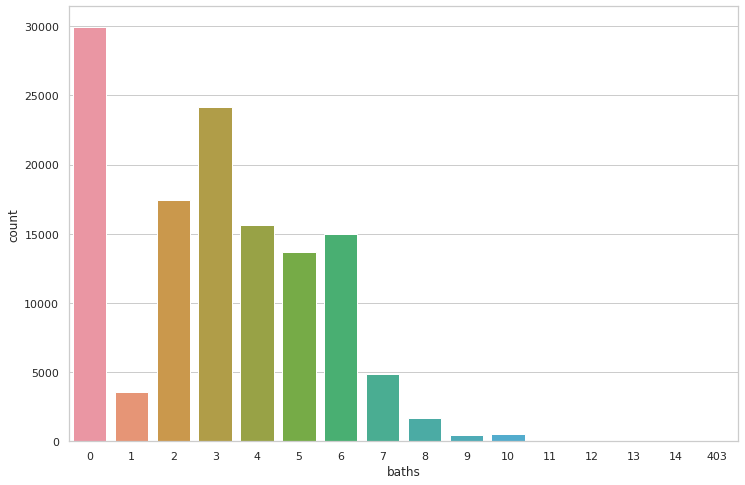

In [ ]:
figure = (12,8)
fig , ax = plt.subplots(figsize=figure)
b= sns.countplot(x=df.baths)

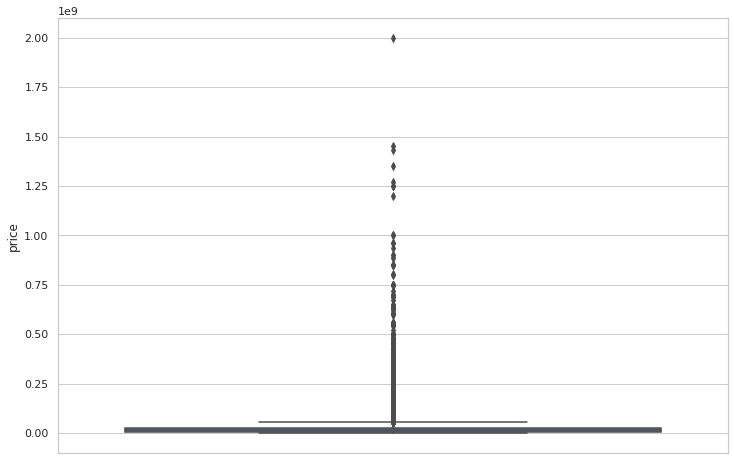

In [ ]:
figure = (12,8)
fig , ax = plt.subplots(figsize=figure)
b= sns.boxplot(y=df.price)

# Removing outliers

Here interquartile technique has been applied to remove outliers, z-score, standard deviation, percentile, DBScan algorithms and many techniques could be used here.

In [ ]:
#finding a IQR
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

In [ ]:
IQR = Q3-Q1

Finding upper and lower boundry


In [ ]:
lower_b =Q1-1.5*IQR
upper_b =Q3+1.5*IQR

Finding Outliers

In [ ]:
#to display the outliers
df[(df.price<lower_b) | (df.price>upper_b)]

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day
0,House,220000000,Model Town,Lahore,31.483869,74.325686,0,32670.12,0,2019,7,17
3,House,125000000,Gulberg,Lahore,31.522069,74.355512,7,5445.02,8,2019,4,4
11,House,87500000,Upper Mall,Lahore,31.542114,74.355898,5,6534.02,4,2019,6,30
33,House,57500000,EME Society,Lahore,31.439978,74.209685,5,5445.02,5,2019,4,3
34,House,620000000,GOR,Lahore,31.543431,74.344225,8,35392.63,8,2019,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
190299,House,60000000,G-13,Islamabad,33.650458,72.956636,6,5445.02,6,2019,7,24
190301,House,55000000,Canal Road,Faisalabad,31.449026,73.168873,0,4356.02,0,2019,7,23
190911,House,70000000,DHA Defence,Lahore,31.460224,74.417911,7,5445.02,6,2019,8,6
190913,Farm House,64500000,Bedian Road,Lahore,31.473474,74.429569,6,21780.08,5,2019,8,6


Trimming outliers

In [ ]:
dfx= df[(df['price']>lower_b) & (df['price']<upper_b)]  
#df3= df[df.price<upper_b]

In [ ]:
dfx= df[df.price<upper_b]

In [ ]:
dfx.shape

(114912, 12)


#Function so it could trim multiple columns

In [ ]:
# def remove_outlier(data,lst):
#     dfx = df
#     for col in lst:
#         q1 = dfx[col].quantile(0.25)
#         q3 = dfx[col].quantile(0.75)
#         iqr = q3-q1
#         lower_b  = q1-1.5*iqr
#         upper_b = q3+1.5*iqr
#         dfx = dfx.loc[(dfx[col] > lower_b) & (dfx[col] < upper_b)]
#     return dfx
def remove_outlier(df, column_lst):
    df_in = df
    for col in column_lst:
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_in = df_in.loc[(df_in[col] > fence_low) & (df_in[col] < fence_high)]
    return df_in

In [ ]:
def draw_plots(df, lst,title=""):
    if len(lst) > 1:
        fig, ax = plt.subplots(1, len(lst), figsize=(16, 5))
        for i in range(0, len(lst)):
            sns.boxplot(y=df[lst[i]],ax=ax[i])
            ax[i].set_title(lst[i])
        fig.suptitle(title)
    else:
        fig, axs = plt.subplots(figsize=(16, 8))
        ax.boxplot(y=df[lst[0]])
        ax.set_title(lst[0])
        fig.suptitle(title)

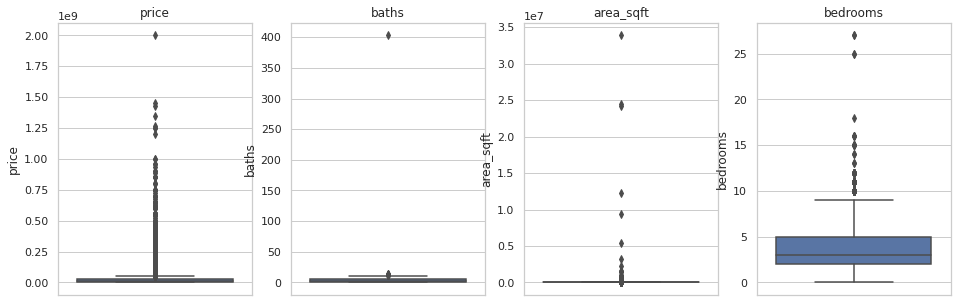

In [ ]:
draw_plots(df, ['price','baths','area_sqft','bedrooms'])

In [ ]:
df2 = remove_outlier(df, ['price','baths','area_sqft','bedrooms'])

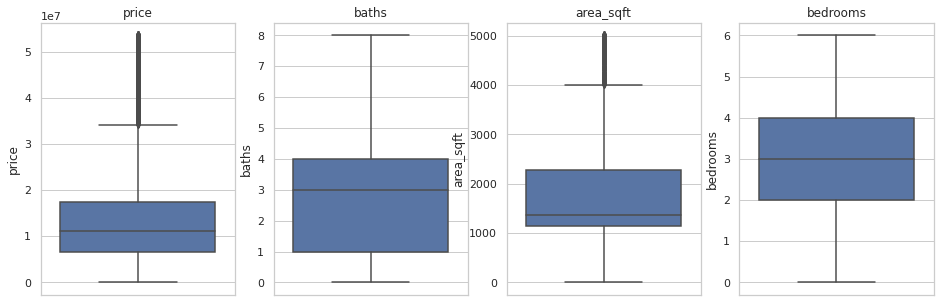

In [ ]:
draw_plots(df2, ['price','baths','area_sqft','bedrooms'])

In [ ]:
df3 = remove_outlier(df2, ['price','area_sqft'])

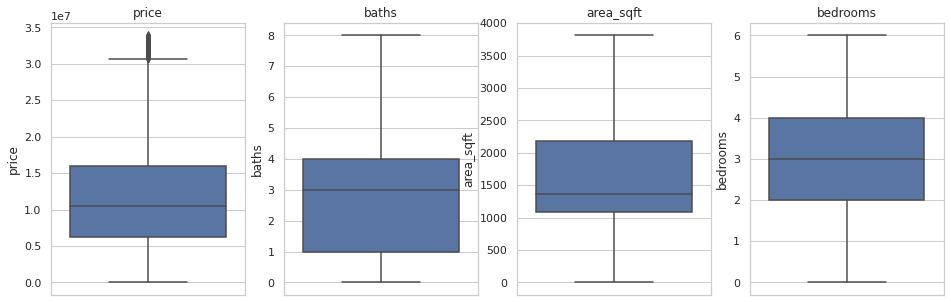

In [ ]:
draw_plots(df3, ['price','baths','area_sqft','bedrooms'])

In [ ]:
df3.shape

(96574, 12)

In [ ]:
# df4=df3.copy()

In [ ]:
df4 = remove_outlier(df3, ['price'])

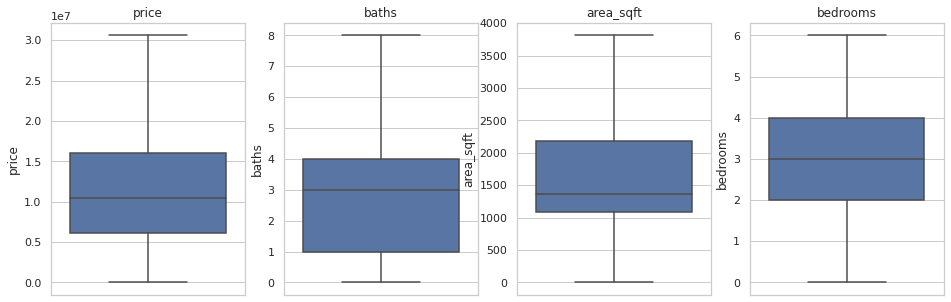

In [ ]:
draw_plots(df4, ['price','baths','area_sqft','bedrooms'])

In [ ]:
df4.shape

(95149, 12)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False

  return True

In [ ]:
df4[df4['area_sqft'].apply(is_float)].head(10)

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day
2,House,9500000,Eden,Lahore,31.499348,74.416959,0,2450.26,3,2019,7,3
4,House,21000000,Allama Iqbal Town,Lahore,31.506483,74.286017,5,2994.76,6,2019,4,4
6,House,16500000,Military Accounts Housing Society,Lahore,31.421229,74.285560,7,2178.01,6,2019,7,3
10,House,13500000,Eden,Lahore,31.441113,74.239683,4,2041.88,4,2019,4,4
12,House,8500000,Park View Villas,Lahore,31.450248,74.200931,4,1361.25,4,2019,7,22
13,House,16500000,Cavalry Ground,Lahore,31.500557,74.367730,0,2722.51,4,2019,4,4
14,House,18500000,Bahria Town,Lahore,31.381706,74.195294,0,2722.51,0,2019,7,4
15,House,23500000,Askari,Lahore,31.537239,74.420211,4,2722.51,4,2019,6,18
19,House,27500000,Askari,Lahore,31.533161,74.419481,5,3267.01,4,2019,6,18
23,House,3200000,Chungi Amar Sadhu,Lahore,31.450925,74.354287,2,816.75,3,2018,12,5


## Feature Engineering
'price' column containes the price of house in 1 lakh = 100000.
Price per square fit is important parameter in house prices.
So we can create new column by the name 'price_per_sqft' and add price per sqft in it. formula = (price * 100000)/total_sqft

In [ ]:
# df4=df2
# df4['price_per_sqft'] = df2['price']/df2['area_sqft']
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']/df5['area_sqft']

In [ ]:
df5.columns

Index(['property_type', 'price', 'location', 'city', 'latitude', 'longitude',
       'baths', 'area_sqft', 'bedrooms', 'year', 'month', 'day',
       'price_per_sqft'],
      dtype='object')

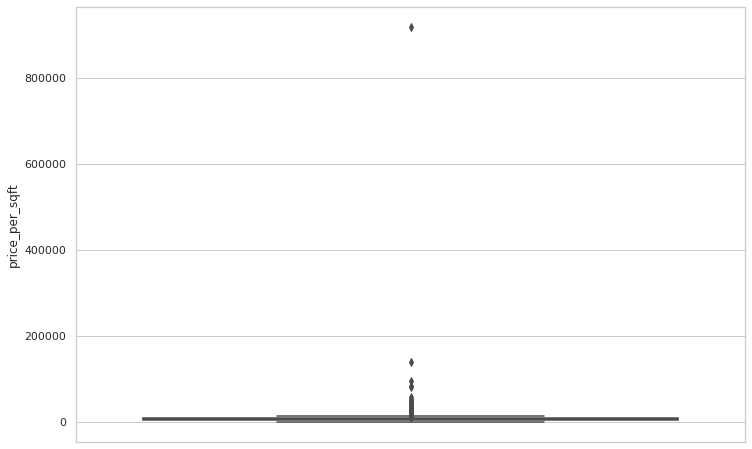

In [ ]:
figure = (12,8)
fig , ax = plt.subplots(figsize=figure)
b= sns.boxplot(y=df5.price_per_sqft)


In [ ]:
df5.price_per_sqft.describe()

count    9.514900e+04
mean              inf
std               NaN
min      0.000000e+00
25%      5.097337e+03
50%      6.836037e+03
75%      8.815395e+03
max               inf
Name: price_per_sqft, dtype: float64

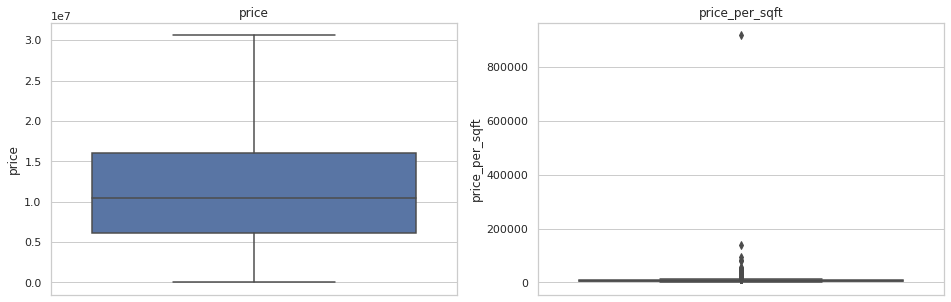

In [ ]:
draw_plots(df5,['price','price_per_sqft'])

In [ ]:
df6 = remove_outlier(df5,['price_per_sqft'])

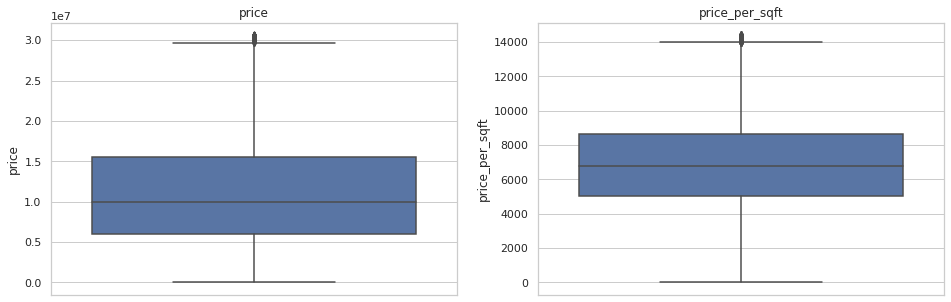

In [ ]:
draw_plots(df6,['price','price_per_sqft'])

In [ ]:
df6.shape

(93183, 13)

In [ ]:
df6 = remove_outlier(df6,['price','price_per_sqft'])

In [ ]:
df6.shape

(92102, 13)

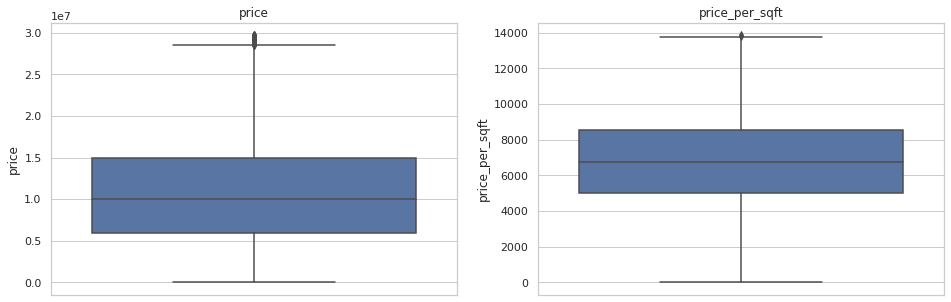

In [ ]:
draw_plots(df6,['price','price_per_sqft'])

In [ ]:
df6 = remove_outlier(df6,['price_per_sqft'])

In [ ]:
df6.shape

(92100, 13)

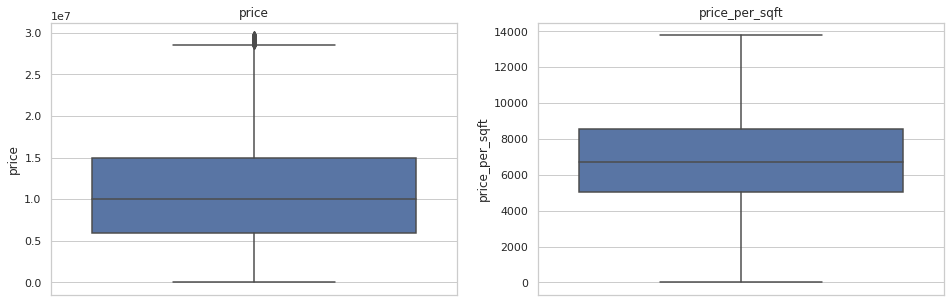

In [ ]:
draw_plots(df6,['price','price_per_sqft'])

In [ ]:
df6.price_per_sqft[:3]

2    3877.139569
4    7012.248060
6    7575.722793
Name: price_per_sqft, dtype: float64

## Dimesionality Reduction
Dimensionality reduction is simply a process of reducing the dimension( or number of random variables) of your feature set
In our dataset 'location' is categorical variable with 1287 categories.
Before using One Hot Encoding to create dummy variables we must reduce the number of categories by using dimensionality reduction so that we will get less number of dummy variables.
Our criteria for dimesionality reduction for 'location' is to use 'other' location for any location having less than 10 data points.

In [ ]:
#Trim the location values
df6.location = df6.location.apply(lambda x: x.strip())
df6.head()

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft
2,House,9500000,Eden,Lahore,31.499348,74.416959,0,2450.26,3,2019,7,3,3877.139569
4,House,21000000,Allama Iqbal Town,Lahore,31.506483,74.286017,5,2994.76,6,2019,4,4,7012.248060
6,House,16500000,Military Accounts Housing Society,Lahore,31.421229,74.285560,7,2178.01,6,2019,7,3,7575.722793
10,House,13500000,Eden,Lahore,31.441113,74.239683,4,2041.88,4,2019,4,4,6611.554058
12,House,8500000,Park View Villas,Lahore,31.450248,74.200931,4,1361.25,4,2019,7,22,6244.260790


In [ ]:
#Lets get the count of each location
location_counts = df6.location.value_counts(ascending=False)
location_counts_less_10=location_counts[location_counts <=10]
location_counts_less_10

Abid Town                         10
National Highway                  10
Gul-e-Damin                       10
Khudadad Colony                   10
Usman Town                        10
                                  ..
Noor Jahan Road                    1
Vital Homes Housing Scheme         1
Hakim Muhammad Ajmal Khan Road     1
Bokra Road                         1
Zafar ul Haq Road                  1
Name: location, Length: 819, dtype: int64

In [ ]:
location_counts_less_10.shape

(819,)

In [ ]:
# location_counts_ind = location_counts.index.values
# location_counts_ind
df6.location = df6.location.apply(lambda x: 'other' if x in location_counts_less_10 else x)


In [ ]:
# for ind in location_counts:
#   df5.iloc[df5['location']==ind]='other'# good( all complete datatype would be object ) assigning value by value but also converts all columns datatype to object
  
  
#   #df5.at[ind, 'location'] = 'other'# wrong assigning value by index, because df5 has no index like locations_counts_ind


In [ ]:
df6.location.value_counts(ascending=False)

Bahria Town Karachi       7560
Bahria Town               5613
DHA Defence               5530
Gulistan-e-Jauhar         3830
Bahria Town Rawalpindi    3529
                          ... 
Jaranwala                   11
Pir Wadhai                  11
Sunny Park                  11
Sodiwal                     11
Kashmir Colony              11
Name: location, Length: 542, dtype: int64

In [ ]:
len(df6[df6.location == 'other'])#.value_counts(ascending=False)

3169

In [ ]:
df6.shape

(92100, 13)

In [ ]:
df6.location.value_counts(ascending=False)

Bahria Town Karachi       7560
Bahria Town               5613
DHA Defence               5530
Gulistan-e-Jauhar         3830
Bahria Town Rawalpindi    3529
                          ... 
Jaranwala                   11
Pir Wadhai                  11
Sunny Park                  11
Sodiwal                     11
Kashmir Colony              11
Name: location, Length: 542, dtype: int64

In [ ]:
df6.head()

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft
2,House,9500000,Eden,Lahore,31.499348,74.416959,0,2450.26,3,2019,7,3,3877.139569
4,House,21000000,Allama Iqbal Town,Lahore,31.506483,74.286017,5,2994.76,6,2019,4,4,7012.248060
6,House,16500000,Military Accounts Housing Society,Lahore,31.421229,74.285560,7,2178.01,6,2019,7,3,7575.722793
10,House,13500000,Eden,Lahore,31.441113,74.239683,4,2041.88,4,2019,4,4,6611.554058
12,House,8500000,Park View Villas,Lahore,31.450248,74.200931,4,1361.25,4,2019,7,22,6244.260790


In [ ]:
len(df6[df.baths==0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


21981

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


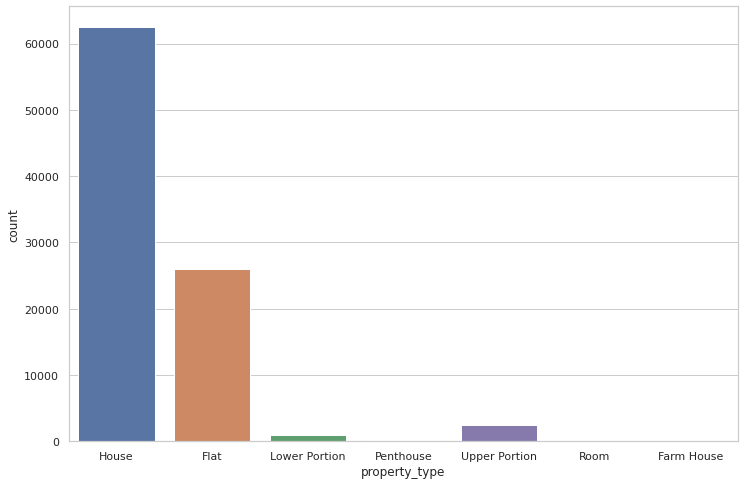

In [ ]:
figure = (12,8)
fig , ax = plt.subplots(figsize=figure)
sns.countplot(df6.property_type)

In [ ]:
df6.property_type.value_counts(ascending=False)

House            62490
Flat             26047
Upper Portion     2434
Lower Portion      885
Penthouse          199
Farm House          29
Room                16
Name: property_type, dtype: int64

In [ ]:
df6[df6.property_type =='Farm House']

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft
41661,Farm House,3200000,Bedian Road,Lahore,31.473474,74.429569,4,816.75,4,2019,6,11,3917.967554
42080,Farm House,4000000,DHA Defence,Islamabad,33.507336,73.266106,2,1361.25,2,2019,6,27,2938.475666
50067,Farm House,24500000,G-11,Islamabad,33.669533,73.000073,4,1905.76,4,2019,4,5,12855.763580
53872,Farm House,11000000,Saddar Town,Karachi,24.876626,67.018219,4,1306.80,2,2019,6,30,8417.508418
62428,Farm House,4000000,Garden West,Karachi,24.873806,67.016224,2,653.40,2,2019,5,6,6121.824304
64703,Farm House,12800000,Bahria Town Rawalpindi,Rawalpindi,33.488368,73.094230,5,1905.76,5,2019,5,5,6716.480564
73790,Farm House,25500000,Paragon City,Lahore,31.534067,74.453945,5,2722.51,4,2019,6,18,9366.356781
87233,Farm House,20000000,Bedian Road,Lahore,31.473474,74.429569,0,2178.01,0,2019,6,11,9182.694294
94465,Farm House,22500000,Bedian Road,Lahore,31.473474,74.429569,0,2178.01,0,2019,6,18,10330.531081
94481,Farm House,20000000,Bedian Road,Lahore,31.473474,74.429569,0,2178.01,0,2019,6,18,9182.694294


## Every property type has some outliers for example farm house contains 0 bath and bedroom.

In [ ]:
# pro_type = ['House',Room','Upper Portion','Lower Portion','Penthouse','Farm House','Room']
# for xi in pro_type:
#   farmhouse_ind= df5[(df5.property_type ==xi) &((df5.baths ==0) |(df5.bedrooms ==0) ) ].index
  
#   df6=df5.drop(farmhouse_ind)

In [ ]:
#removing outlier from each property type respectively
ind= df6[(df6.property_type =='House') &((df6.baths ==0) |(df6.bedrooms ==0) ) ].index
dfh=df6.drop(ind)#removing outlier from each property type respectively

ind= dfh[(dfh.property_type =='Flat') &((dfh.baths ==0) |(dfh.bedrooms ==0) ) ].index
dff=dfh.drop(ind)#removing outlier from each property type respectivelyind= df5[(df5.property_type =='Upper Portion') &((df5.baths ==0) |(df5.bedrooms ==0) ) ].index
  
ind= dff[(dff.property_type =='Lower Portion') &((dff.baths ==0) |(dff.bedrooms ==0) ) ].index
dfl=dff.drop(ind)#removing outlier from each property type respectively


ind= dfl[(dfl.property_type =='Upper Portion') &((dfl.baths ==0) |(dfl.bedrooms ==0) ) ].index
dfu=dfl.drop(ind)#removing outlier from each property type respectively

ind= dfu[(dfu.property_type =='Penthouse') &((dfu.baths ==0) |(dfu.bedrooms ==0) ) ].index
dfp=dfu.drop(ind)#removing outlier from each property type respectively

ind= dfp[(dfp.property_type =='Farm House') &((dfp.baths ==0) |(dfp.bedrooms ==0) ) ].index
dffh=dfp.drop(ind)#removing outlier from each property type respectively

ind= dffh[(dffh.property_type =='Room') &((dffh.baths ==0) |(dffh.bedrooms ==0) ) ].index
df7=dffh.drop(ind)

In [ ]:
#checking outliers
df7[(df7.property_type =='Room') & (df7.baths == 0)]

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft


In above code has been removed outliers like bedroom and baths 0 

In [ ]:
df7[df7.bedrooms == 0]

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft


In [ ]:
df7[df7.baths > df7.bedrooms]

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft
6,House,16500000,Military Accounts Housing Society,Lahore,31.421229,74.285560,7,2178.01,6,2019,7,3,7575.722793
19,House,27500000,Askari,Lahore,31.533161,74.419481,5,3267.01,4,2019,6,18,8417.482652
24,House,21200000,Askari,Lahore,31.536068,74.408666,4,2722.51,3,2019,6,18,7786.931912
25,House,23000000,Askari,Lahore,31.537458,74.413323,5,2722.51,4,2019,6,18,8448.086508
26,House,21500000,Askari,Lahore,31.533270,74.413580,5,2722.51,4,2019,6,18,7897.124345
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190965,House,15500000,G-13,Islamabad,33.645957,72.962472,5,1197.90,4,2019,7,24,12939.310460
190967,House,16300000,G-13,Islamabad,33.645957,72.962472,5,1197.90,4,2019,7,24,13607.145839
190969,House,16200000,G-13,Islamabad,33.645957,72.962472,5,1197.90,4,2019,7,24,13523.666416
190970,House,16000000,G-13,Islamabad,33.645957,72.962472,5,1197.90,4,2019,7,24,13356.707572


Checking the differences between bedrooms and baths if difference is more than 1 it probabily an outlier

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69824 entries, 4 to 190974
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_type   69824 non-null  object 
 1   price           69824 non-null  int64  
 2   location        69824 non-null  object 
 3   city            69824 non-null  object 
 4   latitude        69824 non-null  float64
 5   longitude       69824 non-null  float64
 6   baths           69824 non-null  int64  
 7   area_sqft       69824 non-null  float64
 8   bedrooms        69824 non-null  int64  
 9   year            69824 non-null  int64  
 10  month           69824 non-null  int64  
 11  day             69824 non-null  int64  
 12  price_per_sqft  69824 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 7.5+ MB


In [ ]:
# first i applied 5 value and removed rows, after it i used greater than operator for rest of the differences
df7[(df7['bedrooms']-df7['baths']) >=2]

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft
308,Flat,3500000,Abul Hassan Isphani Road,Karachi,24.941817,67.098056,3,1388.48,5,2019,6,27,2520.742106
317,Flat,4100000,North Karachi,Karachi,24.965828,67.062515,2,925.65,4,2019,1,18,4429.319937
516,House,6000000,Raza Abad,Faisalabad,31.425990,73.048217,2,680.63,4,2019,6,19,8815.362238
644,House,7400000,Sadiqabad,Rawalpindi,33.632398,73.080733,2,1361.25,4,2019,7,5,5436.179982
1059,House,6500000,Mughalpura,Lahore,31.563398,74.389100,3,1089.00,5,2019,7,3,5968.778696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188424,House,11200000,I-10,Islamabad,33.642563,73.035994,2,1089.00,5,2019,7,23,10284.664830
189211,House,4490000,Omega Homes,Lahore,31.617847,74.217387,1,816.75,3,2019,7,23,5497.398225
189214,House,4490000,Omega Homes,Lahore,31.617847,74.217387,1,816.75,3,2019,7,23,5497.398225
189215,House,4490000,Omega Homes,Lahore,31.617847,74.217387,1,816.75,3,2019,7,23,5497.398225


In [ ]:
ind=df7[((df7['bedrooms'])-(df7['baths'])) >=2].index
df8 = df7.drop(ind)

In [ ]:
df8.shape

(67925, 13)

In [ ]:
#same process for baths
df8[((df8['baths'])-(df8['bedrooms'])) >=2]

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft
59,House,19200000,Architects Engineers Housing Society,Lahore,31.443749,74.259152,7,2722.51,5,2019,2,3,7052.315694
70,House,20000000,Bahria Town,Lahore,31.371080,74.190316,7,2722.51,5,2018,11,5,7346.162181
133,House,15500000,other,Lahore,31.409619,74.166126,5,2722.51,3,2019,4,4,5693.275690
153,House,23600000,DHA Defence,Lahore,31.462493,74.409342,6,2722.51,4,2019,7,3,8668.471374
412,Flat,13500000,DHA Defence,Islamabad,33.538087,73.164536,5,2722.51,3,2019,6,4,4958.659472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190283,House,15500000,G-13,Islamabad,33.650065,72.963681,5,1197.90,3,2019,7,24,12939.310460
190309,House,10800000,Bahria Town Rawalpindi,Rawalpindi,33.491160,73.093243,5,1361.25,3,2019,7,23,7933.884298
190311,House,11000000,Bahria Town Rawalpindi,Rawalpindi,33.491160,73.093243,5,1361.25,3,2019,7,23,8080.808081
190961,House,26000000,G-13,Islamabad,33.650065,72.963681,7,2178.01,5,2019,7,24,11937.502583


In [ ]:
ind=df8[((df8['baths'])-(df8['bedrooms'])) >=2].index
df9 = df8.drop(ind)

In [ ]:
df9.shape

(65244, 13)

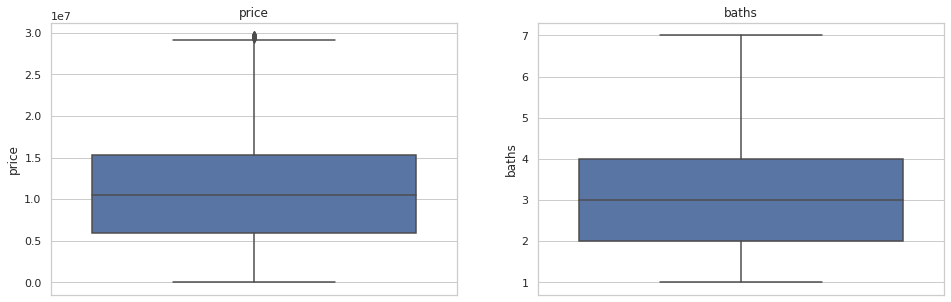

In [ ]:
draw_plots(df9,['price','baths'])

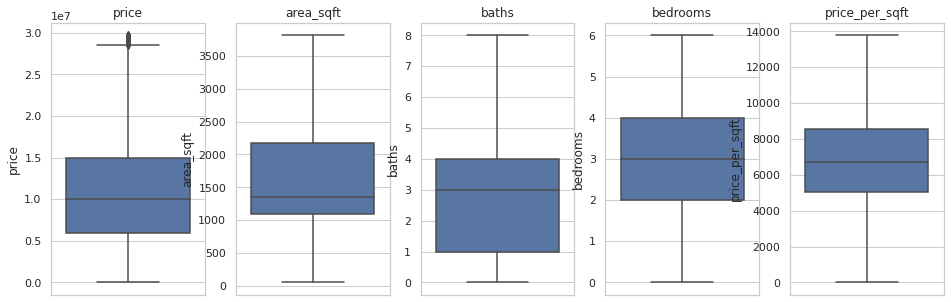

In [ ]:
draw_plots(df6,['price','area_sqft','baths','bedrooms','price_per_sqft'])

In [ ]:
df9.shape

(65244, 13)

In [ ]:
# df10 = remove_outlier(df9, ['price']),'price_per_sqft'])
# df7.shape

In [ ]:
# draw_plots(df9,['price','area_sqft','baths','bedrooms','price_per_sqft'])

In [ ]:
#some time there are some limit of outlier after you can not remove it using IQR
# df8 = remove_outlier(df9, ['price'])
# df8.shape

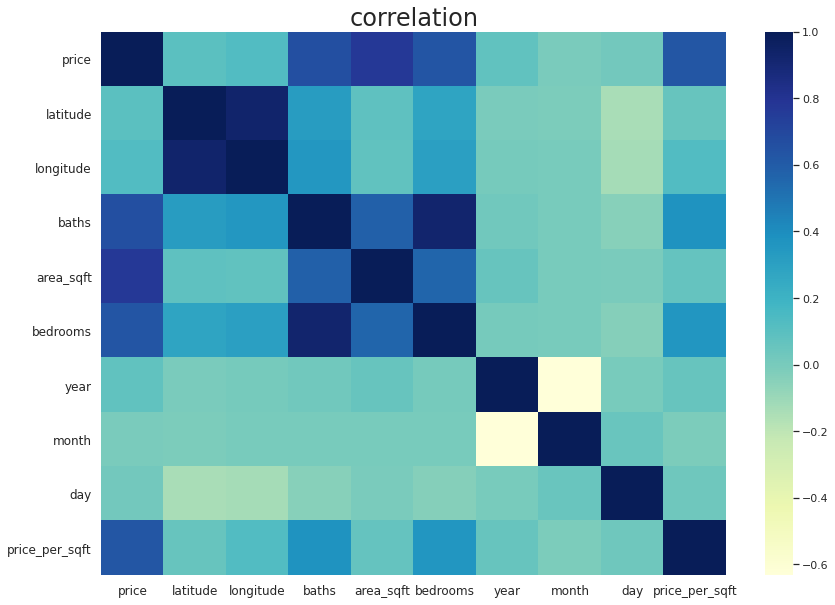

In [ ]:
figure = (14,10)
fig, dim = plt.subplots(figsize=figure)
b=sns.heatmap(df9.corr(),cmap="YlGnBu")
b.axes.set_title('correlation',fontsize=24)
b.set_xlabel('',fontsize=14)
b.set_ylabel('',fontsize=14)
b.tick_params(labelsize=12)

# One hot encodinge
we could use TF-IDF, bag of word etc but these techniques are much useful while text mining, classification, analysis, but here we are just marking these values(labels) because feature has importance here in prediction. One hone encodine save labels in binary form.

In [ ]:
one_hot_encoded_data = pd.get_dummies(df9.location)
one_hot_encoded_data

,ASF Tower,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Abul Hassan Isphani Road,Adiala Road,Afshan Colony,Ahmadabad,Airline Housing Society,Airport,Airport Housing Society,Airport Road,Aisha Manzil,Aitchison Society,Al Faisal Town,Al Fayaz Colony,Al Hafeez Gardens,Al Hamad Colony,Al Jalil Garden,Al Kareem Garden,Al Najaf Colony,Al Noor Garden,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hamd Park,Al-Jannat Housing Society - Kahna,Al-Kabir Town,Al-Noor Colony,Alfalah Town,Ali Alam Garden,Ali Pur,Ali Town,Ali View Garden,Ali View Park,Alipur Farash,Allahabad Road,Allama Iqbal Colony,Allama Iqbal Road,Allama Iqbal Town,...,Suparco Road,Super Highway,Super Town,Swan Garden,T & T Aabpara Housing Society,Taj Bagh Scheme,Tajpura,Taramrri,Tariq Gardens,Tariq Road,Tarlai,Tarnol,Tarogill,Tench Bhata,Thanda Pani,The Springs,Thokar Niaz Baig,Township,Transformer Chowk,Tulsa Road,UET Housing Society,University Road,Valencia Housing Society,Wafaqi Colony,Wahdat Colony,Wahdat Road,Walled City,Walton Road,Wapda City,Wapda Town,Wassanpura,Wazir Town,Westridge,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zaraj Housing Scheme,Zubaida Park,other
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df5.location[:4]

2                                  Eden
4                     Allama Iqbal Town
6     Military Accounts Housing Society
10                                 Eden
Name: location, dtype: object

In [ ]:
df10 = pd.concat([df9,one_hot_encoded_data .drop('other',axis='columns')],axis='columns')
df10.head()

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft,ASF Tower,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Abul Hassan Isphani Road,Adiala Road,Afshan Colony,Ahmadabad,Airline Housing Society,Airport,Airport Housing Society,Airport Road,Aisha Manzil,Aitchison Society,Al Faisal Town,Al Fayaz Colony,Al Hafeez Gardens,Al Hamad Colony,Al Jalil Garden,Al Kareem Garden,Al Najaf Colony,Al Noor Garden,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hamd Park,Al-Jannat Housing Society - Kahna,...,Sunny Park,Suparco Road,Super Highway,Super Town,Swan Garden,T & T Aabpara Housing Society,Taj Bagh Scheme,Tajpura,Taramrri,Tariq Gardens,Tariq Road,Tarlai,Tarnol,Tarogill,Tench Bhata,Thanda Pani,The Springs,Thokar Niaz Baig,Township,Transformer Chowk,Tulsa Road,UET Housing Society,University Road,Valencia Housing Society,Wafaqi Colony,Wahdat Colony,Wahdat Road,Walled City,Walton Road,Wapda City,Wapda Town,Wassanpura,Wazir Town,Westridge,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zaraj Housing Scheme,Zubaida Park
4,House,21000000,Allama Iqbal Town,Lahore,31.506483,74.286017,5,2994.76,6,2019,4,4,7012.248060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,House,16500000,Military Accounts Housing Society,Lahore,31.421229,74.285560,7,2178.01,6,2019,7,3,7575.722793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,House,13500000,Eden,Lahore,31.441113,74.239683,4,2041.88,4,2019,4,4,6611.554058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,House,8500000,Park View Villas,Lahore,31.450248,74.200931,4,1361.25,4,2019,7,22,6244.260790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,House,23500000,Askari,Lahore,31.537239,74.420211,4,2722.51,4,2019,6,18,8631.740563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10[df10.location == 'North Karachi']

,property_type,price,location,city,latitude,longitude,baths,area_sqft,bedrooms,year,month,day,price_per_sqft,ASF Tower,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Abul Hassan Isphani Road,Adiala Road,Afshan Colony,Ahmadabad,Airline Housing Society,Airport,Airport Housing Society,Airport Road,Aisha Manzil,Aitchison Society,Al Faisal Town,Al Fayaz Colony,Al Hafeez Gardens,Al Hamad Colony,Al Jalil Garden,Al Kareem Garden,Al Najaf Colony,Al Noor Garden,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hamd Park,Al-Jannat Housing Society - Kahna,...,Sunny Park,Suparco Road,Super Highway,Super Town,Swan Garden,T & T Aabpara Housing Society,Taj Bagh Scheme,Tajpura,Taramrri,Tariq Gardens,Tariq Road,Tarlai,Tarnol,Tarogill,Tench Bhata,Thanda Pani,The Springs,Thokar Niaz Baig,Township,Transformer Chowk,Tulsa Road,UET Housing Society,University Road,Valencia Housing Society,Wafaqi Colony,Wahdat Colony,Wahdat Road,Walled City,Walton Road,Wapda City,Wapda Town,Wassanpura,Wazir Town,Westridge,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zaraj Housing Scheme,Zubaida Park
329,House,7000000,North Karachi,Karachi,24.969758,67.072692,3,925.65,3,2019,6,7,7562.253552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
369,House,16000000,North Karachi,Karachi,24.974660,67.054667,5,1306.80,5,2019,7,18,12243.648607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1420,Flat,4000000,North Karachi,Karachi,24.972287,67.066298,2,871.20,3,2019,7,18,4591.368228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1425,House,14000000,North Karachi,Karachi,24.959785,67.070190,6,1361.25,6,2019,7,18,10284.664830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1478,House,12000000,North Karachi,Karachi,24.959785,67.070190,4,1306.80,5,2019,7,18,9182.736455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169095,Flat,1850000,North Karachi,Karachi,24.981857,67.060118,1,490.05,1,2019,7,17,3775.124987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170046,Flat,4600000,North Karachi,Karachi,24.990234,67.066505,2,1089.00,3,2019,7,17,4224.058770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175449,House,6600000,North Karachi,Karachi,24.972287,67.066298,3,1334.03,3,2019,7,17,4947.414976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177494,House,12600000,North Karachi,Karachi,24.974660,67.054667,2,1306.80,2,2019,7,17,9641.873278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = df10.drop(['location','city','latitude','longitude','property_type', 'year', 'month', 'day'],axis=1)
df11.head(2)

,price,baths,area_sqft,bedrooms,price_per_sqft,ASF Tower,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Abul Hassan Isphani Road,Adiala Road,Afshan Colony,Ahmadabad,Airline Housing Society,Airport,Airport Housing Society,Airport Road,Aisha Manzil,Aitchison Society,Al Faisal Town,Al Fayaz Colony,Al Hafeez Gardens,Al Hamad Colony,Al Jalil Garden,Al Kareem Garden,Al Najaf Colony,Al Noor Garden,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hamd Park,Al-Jannat Housing Society - Kahna,Al-Kabir Town,Al-Noor Colony,Alfalah Town,Ali Alam Garden,Ali Pur,Ali Town,Ali View Garden,Ali View Park,...,Sunny Park,Suparco Road,Super Highway,Super Town,Swan Garden,T & T Aabpara Housing Society,Taj Bagh Scheme,Tajpura,Taramrri,Tariq Gardens,Tariq Road,Tarlai,Tarnol,Tarogill,Tench Bhata,Thanda Pani,The Springs,Thokar Niaz Baig,Township,Transformer Chowk,Tulsa Road,UET Housing Society,University Road,Valencia Housing Society,Wafaqi Colony,Wahdat Colony,Wahdat Road,Walled City,Walton Road,Wapda City,Wapda Town,Wassanpura,Wazir Town,Westridge,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zaraj Housing Scheme,Zubaida Park
4,21000000,5,2994.76,6,7012.248060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,16500000,7,2178.01,6,7575.722793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11['North Karachi']

4         0
6         0
10        0
12        0
15        0
         ..
190966    0
190967    0
190969    0
190970    0
190971    0
Name: North Karachi, Length: 65244, dtype: uint8

In [ ]:
df11.shape


(65244, 541)

In [ ]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,baths,area_sqft,bedrooms,price_per_sqft,ASF Tower,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Abul Hassan Isphani Road,Adiala Road,Afshan Colony,Ahmadabad,Airline Housing Society,Airport,Airport Housing Society,Airport Road,Aisha Manzil,Aitchison Society,Al Faisal Town,Al Fayaz Colony,Al Hafeez Gardens,Al Hamad Colony,Al Jalil Garden,Al Kareem Garden,Al Najaf Colony,Al Noor Garden,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hamd Park,Al-Jannat Housing Society - Kahna,Al-Kabir Town,Al-Noor Colony,Alfalah Town,Ali Alam Garden,Ali Pur,Ali Town,Ali View Garden,Ali View Park,Alipur Farash,...,Sunny Park,Suparco Road,Super Highway,Super Town,Swan Garden,T & T Aabpara Housing Society,Taj Bagh Scheme,Tajpura,Taramrri,Tariq Gardens,Tariq Road,Tarlai,Tarnol,Tarogill,Tench Bhata,Thanda Pani,The Springs,Thokar Niaz Baig,Township,Transformer Chowk,Tulsa Road,UET Housing Society,University Road,Valencia Housing Society,Wafaqi Colony,Wahdat Colony,Wahdat Road,Walled City,Walton Road,Wapda City,Wapda Town,Wassanpura,Wazir Town,Westridge,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zaraj Housing Scheme,Zubaida Park
4,5,2994.76,6,7012.248060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,2178.01,6,7575.722793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,4,2041.88,4,6611.554058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df11.price

# Model training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=8)

# Fitting and checking score of a model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9440191406152163

## Finding predicted y

In [ ]:
pred_ylr = lr.predict(X_test)

In [ ]:
from sklearn import metrics
print('Linear Regressor Performance\n')
print('MAE:', round(metrics.mean_absolute_error(y_test, pred_ylr),2)) 
print('MSE:', round(metrics.mean_squared_error(y_test, pred_ylr),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred_ylr)),2)) 

Linear Regressor Performance

MAE: 1121814.25
MSE: 2471080239072.32
RMSE: 1571967.0


In [ ]:
pd.DataFrame(lr.coef_  ,X.columns, columns=['Coeffecient'])

,Coeffecient
baths,89082.376909
area_sqft,6477.366944
bedrooms,17580.059832
price_per_sqft,1526.472461
ASF Tower,-674301.940585
...,...
Yousaf Town,370639.024367
Zaheer Villas,-256250.265372
Zaitoon - New Lahore City,179255.058927
Zaraj Housing Scheme,393806.258530


In [ ]:
def predict_price(location,baths,area_sqft,bedrooms,price_per_sqft):    
    loc_index = np.where(X.columns==location)[0][0]
   
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = area_sqft
    x[2] = bedrooms
    x[3] = price_per_sqft
    if loc_index >= 0:
        x[loc_index] = 1
    return lr.predict([x])[0]
  

# For understanding that how does predict_price() work

In [ ]:
loc_index = np.where(X.columns=='ASF Tower')[0][0]
loc_index

4

In [ ]:
X.columns

Index(['baths', 'area_sqft', 'bedrooms', 'price_per_sqft', 'ASF Tower',
       'AWT Army Welfare Trust', 'Aashiana Road',
       'Abdalians Cooperative Housing Society', 'Abul Hassan Isphani Road',
       'Adiala Road',
       ...
       'Wapda Town', 'Wassanpura', 'Wazir Town', 'Westridge', 'Yousaf Colony',
       'Yousaf Town', 'Zaheer Villas', 'Zaitoon - New Lahore City',
       'Zaraj Housing Scheme', 'Zubaida Park'],
      dtype='object', length=540)

In [ ]:
x= np.zeros(20)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
x[0] = 5
x[1] = 2100
x[2] = 6
x[3] = 9800

In [ ]:
x[2]

6.0

In [ ]:
#First argument is location
#Second argument is bathrooms
#Third argument is area of square feet
#Last and fourth argument is bedrooms
print("Rs:",predict_price('ASF Tower',3	,2178.01,	3,9182.694294	))

4
Rs: 17473702.175123733


In [ ]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 9.42174922e-01, -2.28242445e+12,  9.42874071e-01,  9.44232628e-01,
       -3.01524407e+12])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,-1.054600e+13,{'normalize': False}
1,lasso,9.436214e-01,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,9.998697e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
